# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
dataset_train = pd.read_csv('IDEA.NS.csv')
training_set = dataset_train.iloc[:, 7:8].values

In [3]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694 entries, 0 to 693
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           694 non-null    object 
 1   Open                           694 non-null    float64
 2   High                           694 non-null    float64
 3   Low                            694 non-null    float64
 4   close to 4 week average ratio  694 non-null    float64
 5   Volume                         694 non-null    int64  
 6   Nifty Close                    694 non-null    float64
 7   Close                          694 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 43.5+ KB


In [4]:
len(training_set)

694

### Feature Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [6]:
week=4

### Creating a data structure with 60 timesteps and 1 output

In [7]:
X_train = []
y_train = []
for i in range(week, 600):
    X_train.append(training_set_scaled[i-week:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [8]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [9]:
sc.inverse_transform([[0.13061719]])

array([[18.24999986]])

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [11]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [12]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (week, 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [13]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [14]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [15]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [16]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [17]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [18]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
19/19 [==============================] - 6s 11ms/step - loss: 0.2181
Epoch 2/100
19/19 [==============================] - 0s 10ms/step - loss: 0.0370
Epoch 3/100
19/19 [==============================] - 0s 10ms/step - loss: 0.0221
Epoch 4/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0126
Epoch 5/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0077
Epoch 6/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0062
Epoch 7/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0057
Epoch 8/100
19/19 [==============================] - 0s 10ms/step - loss: 0.0056
Epoch 9/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0060
Epoch 10/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0058
Epoch 11/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0056
Epoch 12/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0048
Epoch 13/100
19/19 [=====

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [19]:
dataset_test = pd.read_csv('IDEA.NS.csv')
real_stock_price = dataset_test.iloc[600:, 7:8].values

In [20]:
real_stock_price[0]

array([16.299999])

### Getting the predicted stock price of 2017

In [21]:
dataset_test = pd.read_csv('IDEA.NS.csv')
inputs = dataset_test.iloc[588:, 7:8].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(week, 94):
    X_test.append(inputs[i-week:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualising the results

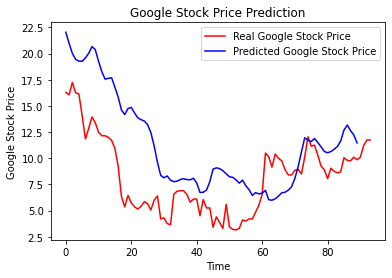

In [22]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()